# **Veri Ön İşleme adımı**

Veri ön işleme adımına kadar kod aynı kalacaktır. Kod aşağıdadır:

In [2]:
#Veri Ön İşleme Adımı
#Kitaplıkları içe aktarma  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('/kaggle/input/user-datacsv/User_Data.csv')  
  
#Bağımsız ve Bağımlı Değişken Çıkarma  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
#Veri setini eğitim ve test setine bölmek 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

#özellik Ölçekleme  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

# **DVM sınıflandırıcısını eğitim setine yerleştirme**

Artık eğitim seti SVM sınıflandırıcısına takılacaktır. SVM sınıflandırıcısını oluşturmak için SVC sınıfını Sklearn.svm kütüphanesinden içe aktaracağız. Aşağıda bunun kodu verilmiştir:


In [3]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

Yukarıdaki kodda kernel='linear' kullandık, çünkü burada doğrusal olarak ayrılabilir veriler için SVM oluşturuyoruz. Ancak doğrusal olmayan veriler için bunu değiştirebiliriz. Daha sonra sınıflandırıcıyı eğitim veri setine (x_train, y_train) yerleştirdik.

Model performansı, C (Düzenlileştirme faktörü), gama ve çekirdek değeri değiştirilerek değiştirilebilir.

# **Test seti sonucunun tahmin edilmesi**

Şimdi test setinin çıktısını tahmin edeceğiz. Bunun için yeni bir y_pred vektörü oluşturacağız. Aşağıda bunun kodu verilmiştir:

In [4]:
y_pred= classifier.predict(x_test)  

Y_pred vektörünü aldıktan sonra, gerçek değer ile tahmin edilen değer arasındaki farkı kontrol etmek için y_pred ve y_test sonucunu karşılaştırabiliriz.

# **Karışıklık matrisinin oluşturulması**

Şimdi SVM sınıflandırıcısının performansını, Lojistik regresyon sınıflandırıcısına kıyasla ne kadar yanlış tahmin olduğunu göreceğiz. Karışıklık matrisini oluşturmak için sklearn kütüphanesinin Confused_matrix fonksiyonunu içe aktarmamız gerekiyor. Fonksiyonu içe aktardıktan sonra onu yeni bir cm değişkeni kullanarak çağıracağız. İşlev iki parametre alır; temel olarak **y_true (gerçek değerler) ve y_pred (sınıflandırıcı tarafından döndürülen hedef değer)**. Aşağıda bunun kodu verilmiştir:

In [26]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import scikitplot.metrics as splt

[[66  2]
 [ 8 24]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

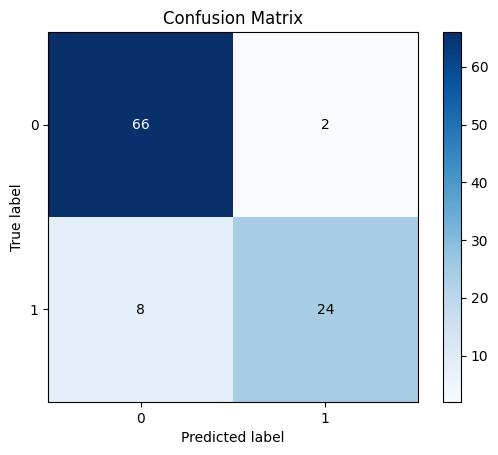

In [28]:
cm = confusion_matrix(y_test, y_pred) 
print(cm)
splt.plot_confusion_matrix(y_test, y_pred)

Yukarıdaki çıktı görselinde de görebileceğiniz gibi 66+24= 90 doğru tahmin, 8+2= 10 doğru tahmin bulunmaktadır. Dolayısıyla SVM modelimizin Lojistik regresyon modeline göre geliştiğini söyleyebiliriz.

# **Eğitim seti sonucunun görselleştirilmesi**
Şimdi eğitim seti sonucunu görselleştireceğiz, bunun kodu aşağıdadır:

/tmp/ipykernel_47/2835576322.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


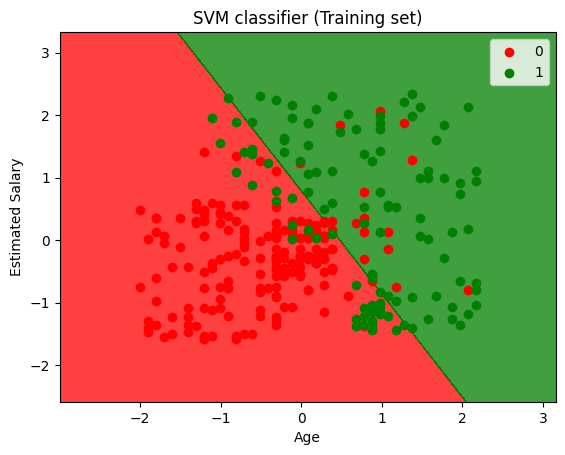

In [29]:
from matplotlib.colors import ListedColormap 

x_set, y_set = x_train, y_train  

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  

for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)
    
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

Görüldüğü gibi yukarıdaki çıktı Lojistik regresyon çıktısına benzer görünmektedir. Sınıflandırıcıda doğrusal bir çekirdek kullandığımız için çıktıda hiperdüzlem olarak düz bir çizgi elde ettik. Ayrıca yukarıda 2 boyutlu uzay için SVM'deki hiperdüzlemin düz bir çizgi olduğunu da tartışmıştık.

# **Test seti sonucunun görselleştirilmesi**

/tmp/ipykernel_47/2254260839.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


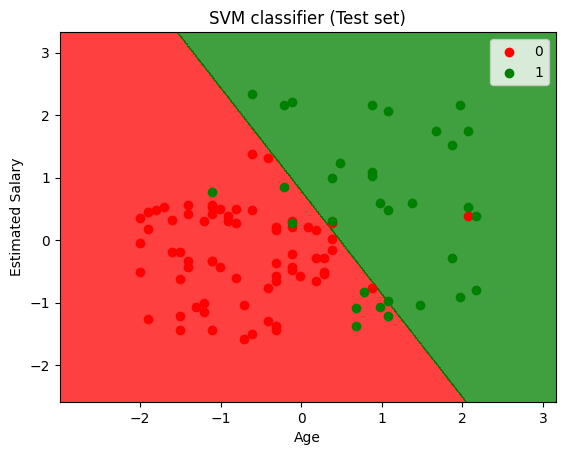

In [30]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test 

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j) 
    
mtp.title('SVM classifier (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

Yukarıdaki çıktı görüntüsünde de görebileceğimiz gibi SVM sınıflandırıcısı kullanıcıları iki bölgeye (Satın Alınan veya Satın Alınmayan) ayırmıştır. SUV'u satın alan kullanıcılar kırmızı dağılım noktalarının bulunduğu kırmızı bölgede yer alıyor. SUV'u satın almayan kullanıcılar ise yeşil dağılım noktalarının bulunduğu yeşil bölgede bulunuyor. Hiperdüzlem, iki sınıfı Satın Alınan ve Satın Alınmayan değişkenlere ayırmıştır.